In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

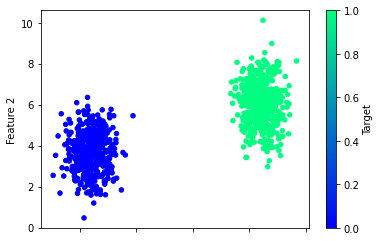

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# add the output layer that uses a probability activation fucntion
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 849us/step - loss: 0.5094 - accuracy: 0.9947
Epoch 2/100
24/24 [==============================] - 0s 666us/step - loss: 0.4951 - accuracy: 0.9947
Epoch 3/100
24/24 [==============================] - 0s 680us/step - loss: 0.4814 - accuracy: 0.9947
Epoch 4/100
24/24 [==============================] - 0s 597us/step - loss: 0.4680 - accuracy: 0.9947
Epoch 5/100
24/24 [==============================] - 0s 567us/step - loss: 0.4549 - accuracy: 0.9947
Epoch 6/100
24/24 [==============================] - 0s 599us/step - loss: 0.4422 - accuracy: 0.9947
Epoch 7/100
24/24 [==============================] - 0s 561us/step - loss: 0.4300 - accuracy: 0.9947
Epoch 8/100
24/24 [==============================] - 0s 545us/step - loss: 0.4181 - accuracy: 0.9947
Epoch 9/100
24/24 [==============================] - 0s 534us/step - loss: 0.4067 - accuracy: 0.9960
Epoch 10/100
24/24 [==============================] - 0s 551us/step - loss: 0.3957 - accura

24/24 [==============================] - 0s 614us/step - loss: 0.0967 - accuracy: 1.0000
Epoch 82/100
24/24 [==============================] - 0s 575us/step - loss: 0.0952 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 550us/step - loss: 0.0937 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 509us/step - loss: 0.0923 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 535us/step - loss: 0.0909 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 535us/step - loss: 0.0895 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 532us/step - loss: 0.0882 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 538us/step - loss: 0.0868 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 547us/step - loss: 0.0856 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 520us/step - loss: 0.0843 - accuracy: 

<AxesSubplot:>

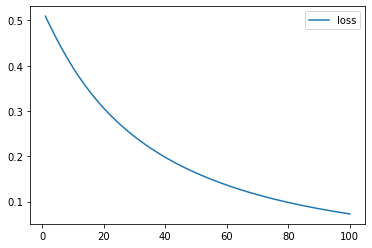

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

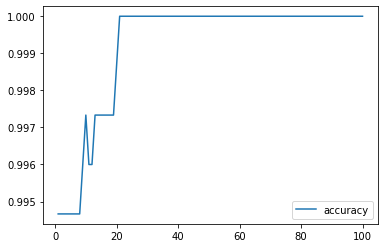

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0679 - accuracy: 1.0000
Loss: 0.06792723387479782, Accuracy: 1.0


In [15]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) >0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

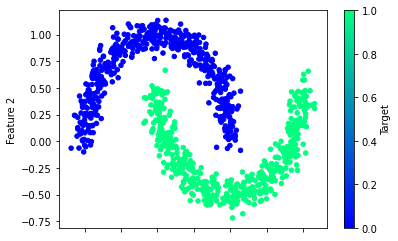

In [17]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [18]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [25]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 871us/step - loss: 0.2507 - accuracy: 0.8920
Epoch 2/100
24/24 [==============================] - 0s 864us/step - loss: 0.2506 - accuracy: 0.8920
Epoch 3/100
24/24 [==============================] - 0s 823us/step - loss: 0.2505 - accuracy: 0.8920
Epoch 4/100
24/24 [==============================] - 0s 805us/step - loss: 0.2506 - accuracy: 0.8907
Epoch 5/100
24/24 [==============================] - 0s 795us/step - loss: 0.2504 - accuracy: 0.8933
Epoch 6/100
24/24 [==============================] - 0s 782us/step - loss: 0.2504 - accuracy: 0.8920
Epoch 7/100
24/24 [==============================] - 0s 793us/step - loss: 0.2504 - accuracy: 0.8920
Epoch 8/100
24/24 [==============================] - 0s 776us/step - loss: 0.2503 - accuracy: 0.8920
Epoch 9/100
24/24 [==============================] - 0s 748us/step - loss: 0.2502 - accuracy: 0.8920
Epoch 10/100
24/24 [==============================] - 0s 813us/step - loss: 0.2502 - accura

24/24 [==============================] - 0s 710us/step - loss: 0.2476 - accuracy: 0.8907
Epoch 82/100
24/24 [==============================] - 0s 815us/step - loss: 0.2475 - accuracy: 0.8920
Epoch 83/100
24/24 [==============================] - 0s 760us/step - loss: 0.2474 - accuracy: 0.8920
Epoch 84/100
24/24 [==============================] - 0s 739us/step - loss: 0.2473 - accuracy: 0.8920
Epoch 85/100
24/24 [==============================] - 0s 775us/step - loss: 0.2473 - accuracy: 0.8920
Epoch 86/100
24/24 [==============================] - 0s 715us/step - loss: 0.2473 - accuracy: 0.8920
Epoch 87/100
24/24 [==============================] - 0s 746us/step - loss: 0.2473 - accuracy: 0.8920
Epoch 88/100
24/24 [==============================] - 0s 764us/step - loss: 0.2474 - accuracy: 0.8920
Epoch 89/100
24/24 [==============================] - 0s 798us/step - loss: 0.2472 - accuracy: 0.8893
Epoch 90/100
24/24 [==============================] - 0s 831us/step - loss: 0.2472 - accuracy: 

<AxesSubplot:>

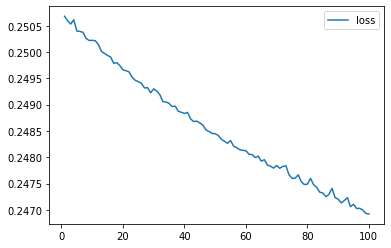

In [26]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

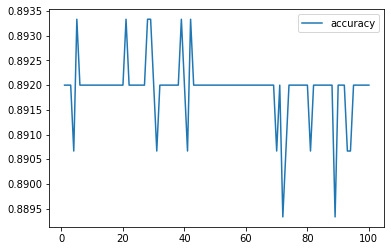

In [27]:
# Plot the loss
history_df.plot(y="accuracy")

In [28]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [29]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [30]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 783us/step - loss: 0.9853 - accuracy: 0.4627
Epoch 2/100
24/24 [==============================] - 0s 576us/step - loss: 0.9105 - accuracy: 0.4547
Epoch 3/100
24/24 [==============================] - 0s 600us/step - loss: 0.8422 - accuracy: 0.4560
Epoch 4/100
24/24 [==============================] - 0s 616us/step - loss: 0.7811 - accuracy: 0.4653
Epoch 5/100
24/24 [==============================] - 0s 579us/step - loss: 0.7251 - accuracy: 0.4760
Epoch 6/100
24/24 [==============================] - 0s 577us/step - loss: 0.6746 - accuracy: 0.4987
Epoch 7/100
24/24 [==============================] - 0s 584us/step - loss: 0.6299 - accuracy: 0.5173
Epoch 8/100
24/24 [==============================] - 0s 553us/step - loss: 0.5880 - accuracy: 0.5533
Epoch 9/100
24/24 [==============================] - 0s 555us/step - loss: 0.5516 - accuracy: 0.6027
Epoch 10/100
24/24 [==============================] - 0s 544us/step - loss: 0.5179 - accura

24/24 [==============================] - 0s 542us/step - loss: 0.2524 - accuracy: 0.8987
Epoch 82/100
24/24 [==============================] - 0s 580us/step - loss: 0.2524 - accuracy: 0.8987
Epoch 83/100
24/24 [==============================] - 0s 542us/step - loss: 0.2523 - accuracy: 0.8987
Epoch 84/100
24/24 [==============================] - 0s 530us/step - loss: 0.2523 - accuracy: 0.8973
Epoch 85/100
24/24 [==============================] - 0s 520us/step - loss: 0.2522 - accuracy: 0.8960
Epoch 86/100
24/24 [==============================] - 0s 545us/step - loss: 0.2522 - accuracy: 0.8960
Epoch 87/100
24/24 [==============================] - 0s 524us/step - loss: 0.2521 - accuracy: 0.8973
Epoch 88/100
24/24 [==============================] - 0s 530us/step - loss: 0.2521 - accuracy: 0.8960
Epoch 89/100
24/24 [==============================] - 0s 547us/step - loss: 0.2521 - accuracy: 0.8960
Epoch 90/100
24/24 [==============================] - 0s 532us/step - loss: 0.2520 - accuracy: 